In [1]:
# IMPORTING MAJOR LIBRARIES

import keras
import PIL

In [2]:
# IMPORTING LAYERS AND MODEL

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization

In [3]:
# Initialising the CNN MODEL

model=Sequential();

In [4]:
# ADDING LAYERS 

model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

In [5]:
# FLATTENING THE LAYERS

model.add(Flatten())

In [6]:
# CREATING FULL CONNECTION

model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))

In [7]:
# COMPILING the CNN MODEL

model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
# ANALYZING THE MODEL

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [10]:
# Validation data generator

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/train', target_size = (64, 64), batch_size = 32,class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test', target_size = (64, 64), batch_size = 32, class_mode = 'binary')

Found 20392 images belonging to 2 classes.
Found 4608 images belonging to 2 classes.


In [11]:
# TRAINING THE MODEL

model.fit_generator(training_set,steps_per_epoch=20392/32, epochs = 28, validation_data = test_set, validation_steps = 4608/32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/28
638/637 [==============================] - 289s 453ms/step - loss: 0.6013 - accuracy: 0.6903 - val_loss: 0.6236 - val_accuracy: 0.6886
Epoch 2/28
638/637 [==============================] - 294s 461ms/step - loss: 0.4973 - accuracy: 0.7604 - val_loss: 0.6512 - val_accuracy: 0.6892
Epoch 3/28
638/637 [==============================] - 280s 440ms/step - loss: 0.4561 - accuracy: 0.7868 - val_loss: 0.6407 - val_accuracy: 0.7335
Epoch 4/28
638/637 [==============================] - 282s 443ms/step - loss: 0.4274 - accuracy: 0.8003 - val_loss: 0.4465 - val_accuracy: 0.7971
Epoch 5/28
638/637 [==============================] - 284s 445ms/step - loss: 0.4096 - accuracy: 0.8133 - val_loss: 0.4724 - val_accuracy: 0.7756
Epoch 6/28
638/637 [==============================] - 288s 451ms/step - loss: 0.3913 - accuracy: 0.8232 - val_loss: 0.8390 - val_accuracy: 0.6304
Epoch 7/28
638/637 [============================

dog


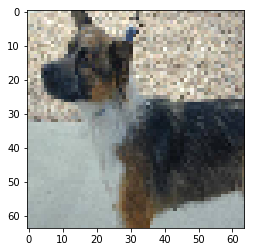

In [27]:
# PREDICTION PART -1 FOR DOG IMAGE

import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
tested_image = image.load_img('dataset/test1/dogsfortest/dog.3.jpg',target_size=(64,64))
plt.imshow(tested_image)
tested_image = image.img_to_array(tested_image)
tested_image = np.expand_dims(tested_image,axis = 0)
output = model.predict(tested_image)
training_set.class_indices
if output[0][0] ==1:
  prediction = 'dog'
  print(prediction )
else:
  prediction = 'cat'
  print(prediction )

dog


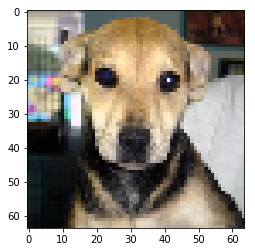

In [28]:
# PREDICTION PART -1 FOR another DOG IMAGE

import numpy as np
from keras.preprocessing import image
tested_image = image.load_img('dataset/test1/dogsfortest/dog.4.jpg',target_size=(64,64))
plt.imshow(tested_image)
tested_image = image.img_to_array(tested_image)
tested_image = np.expand_dims(tested_image,axis = 0)
output = model.predict(tested_image)
training_set.class_indices
if output[0][0] ==1:
  prediction = 'dog'
  print(prediction )
else:
  prediction = 'cat'
  print(prediction )


cat


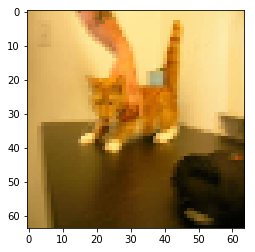

In [29]:
# PREDICTION PART -2 FOR CAT IMAGE

import numpy as np
from keras.preprocessing import image
tested_image = image.load_img('dataset/test1/catsfortest/cat.0.jpg',target_size=(64,64))
plt.imshow(tested_image)
tested_image = image.img_to_array(tested_image)
tested_image = np.expand_dims(tested_image,axis = 0)
output = model.predict(tested_image)
training_set.class_indices
if output[0][0] ==1:
  prediction = 'dog'
  print(prediction )
else:
  prediction = 'cat'
  print(prediction )

cat


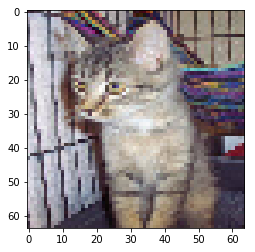

In [30]:
# PREDICTION PART -2 FOR another CAT IMAGE

import numpy as np
from keras.preprocessing import image
tested_image = image.load_img('dataset/test1/catsfortest/cat.2.jpg',target_size=(64,64))
plt.imshow(tested_image)
tested_image = image.img_to_array(tested_image)
tested_image = np.expand_dims(tested_image,axis = 0)
output = model.predict(tested_image)
training_set.class_indices
if output[0][0] ==1:
  prediction = 'dog'
  print(prediction )
else:
  prediction = 'cat'
  print(prediction )